<a href="https://colab.research.google.com/github/sinhaanupamindia/Projects/blob/main/Air_passenger_forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#Build a model to forecast the demand(passenger traffic) in Airplanes. 
#The data is classified in date/time and the passengers travelling per month.

In [97]:
import pandas as pd
import numpy as np


In [98]:
data = pd.read_csv("/content/air.csv")

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [66]:
dataset = pd.read_csv("/content/air.csv")
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [67]:

#Parse strings to datetime type

dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format =True)
#indexing Month as index
indexedDataset = dataset.set_index(['Month'])
indexedDataset





,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [68]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


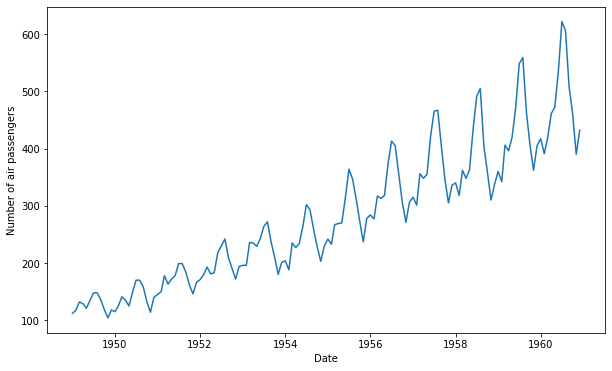

In [69]:
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

In [70]:
#Determining rolling statistics
rolmean = indexedDataset.rolling(window = 12).mean()

rolstd = indexedDataset.rolling(window = 12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


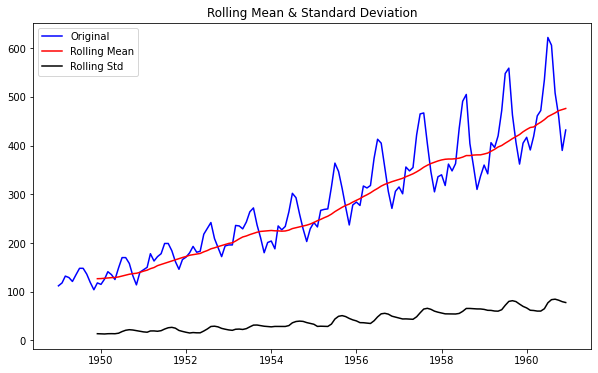

In [71]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc ='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)
#Rolling mean is not constant and it is increasing
#Rolling variance is also not constant


In [72]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
#Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test')
dftest = adfuller(indexedDataset['#Passengers'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
	dfoutput['Critical Value (%s) %key'] =value

print(dfoutput)

Result of Dickey-Fuller Test
Test Statistics                  0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (%s) %key        -2.578770
dtype: float64


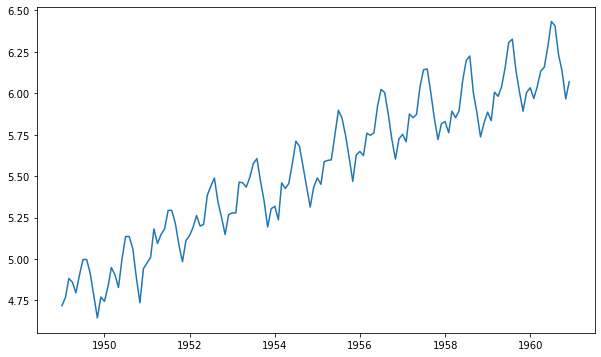

In [74]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

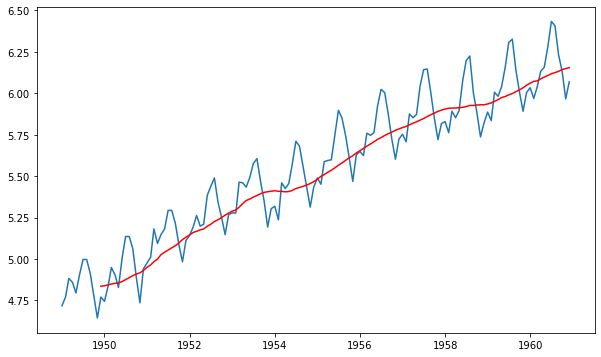

In [75]:
movingAverage = indexedDataset_logScale.rolling(window = 12).mean()
movingSTD = indexedDataset_logScale.rolling(window = 12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color ='red')


In [76]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove nan values
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [77]:
pip install statsmodels  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
	
	#Determining rolling statistics
	movingAverage = timeseries.rolling(window=12).mean()
	movingSTD     = timeseries.rolling(window=12).std()
	
	#plot rolling statistics:
	orig = plt.plot(timeseries, color = 'blue', label = 'Original')
	mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
	std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
	plt.legend(loc = 'best')
	plt.title('Rolling Mean and standard Deviation')
	plt.show(block = False)
	
	
	#Perform Dickey-Fuller test:
	print('Results of Dickey-Fuller Test:')
	dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
	dfoutput = pd.Series (dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Obesrvations Used'])
	for key,value in dftest[4].items():
		dfoutput['Critical Value (%s)' %key] =value
	print(dfoutput)
	

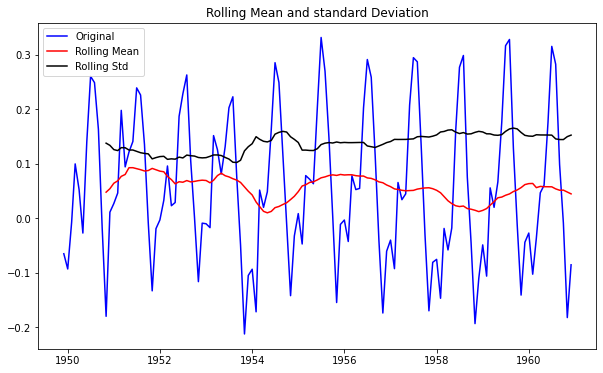

Results of Dickey-Fuller Test:
Test Statistics                 -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Obesrvations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [79]:
test_stationarity(datasetLogScaleMinusMovingAverage)

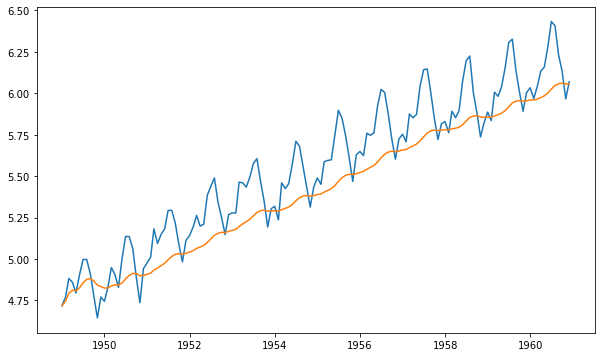

In [80]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife =12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage)


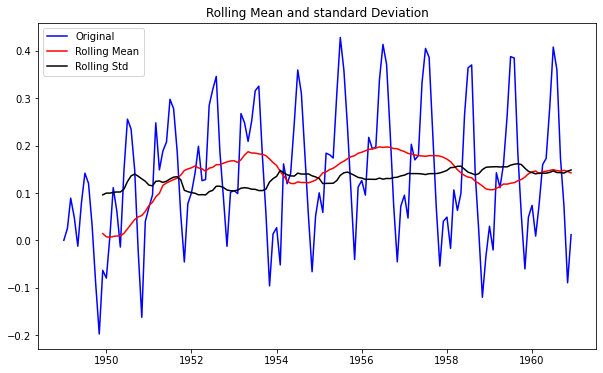

Results of Dickey-Fuller Test:
Test Statistics                 -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Obesrvations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [81]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

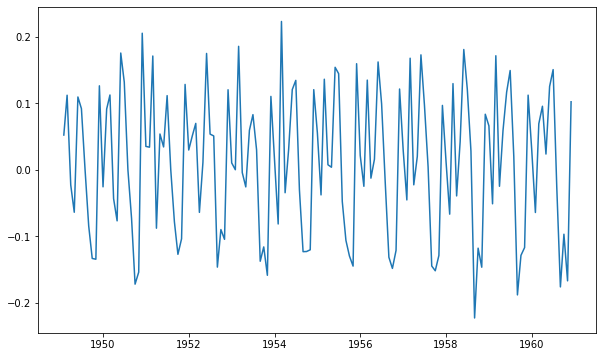

In [82]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

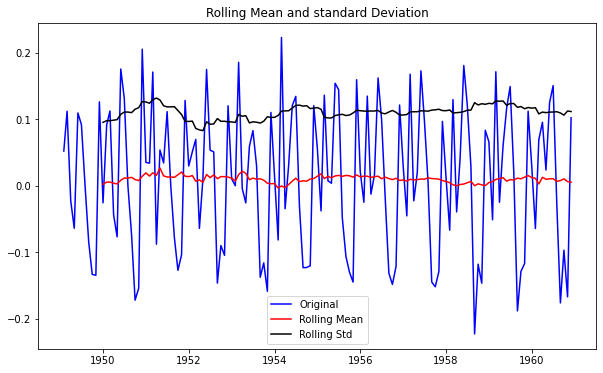

Results of Dickey-Fuller Test:
Test Statistics                 -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Obesrvations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [83]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

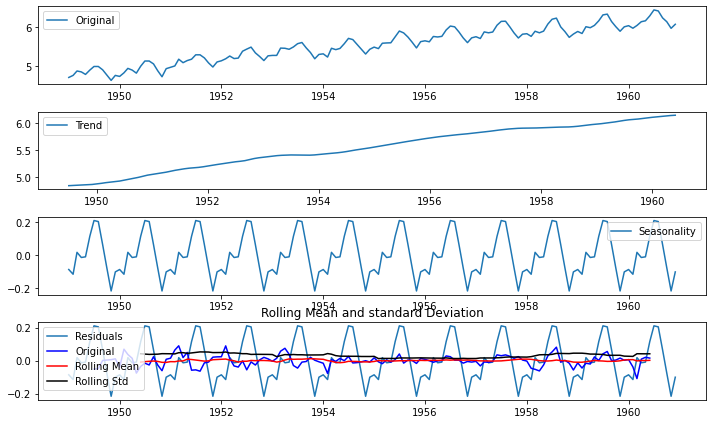

Results of Dickey-Fuller Test:


KeyError: ignored

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc ='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(seasonal, label = 'Residuals')
plt.legend(loc ='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)['#Passengers']

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

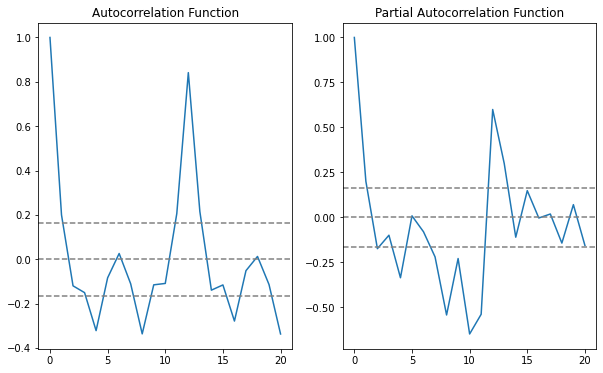

In [85]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf) 
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')





/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Plotting AR model


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


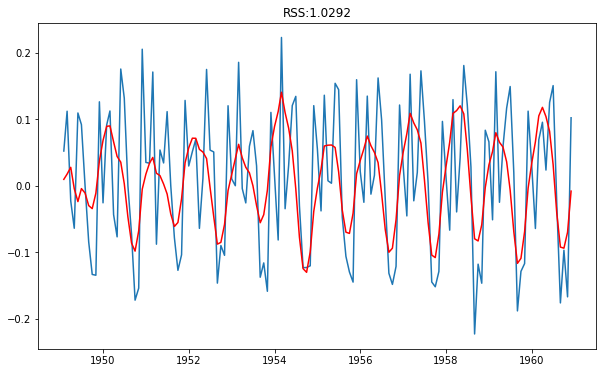

In [86]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


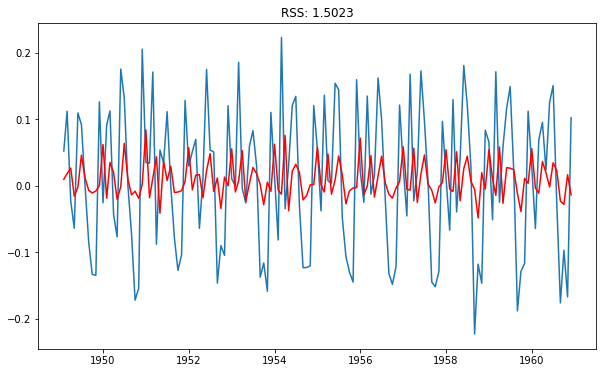

In [87]:
#MA model
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))
results_MA = model.fit(disp =-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Text(0.5, 1.0, 'RSS: 1.0292')

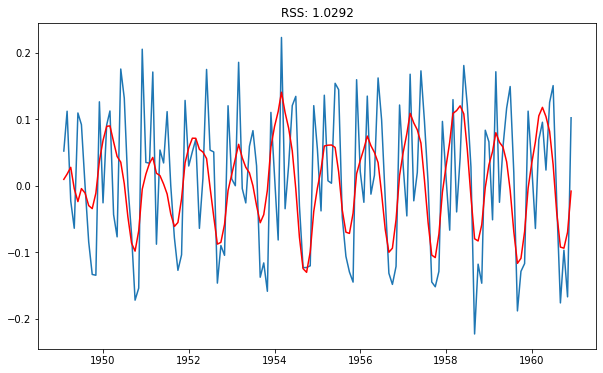

In [102]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting["#Passengers"])**2))


In [88]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [89]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [90]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [91]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'][0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

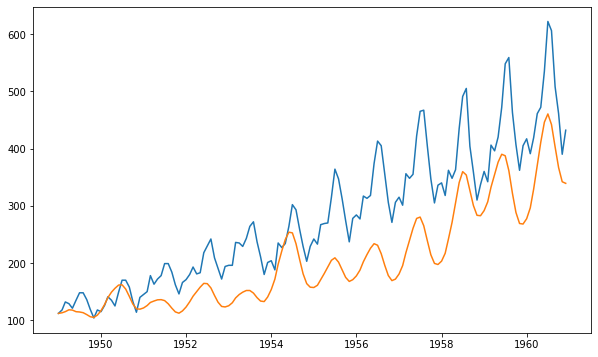

In [92]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [93]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


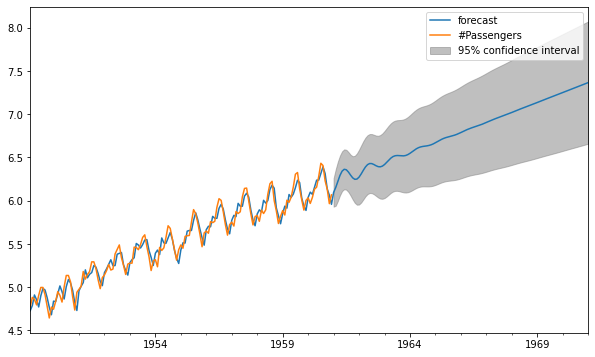

In [94]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps =120)


In [95]:
x[1]

array([0.08384711, 0.10749462, 0.11568695, 0.11702776, 0.11703497,
       0.11744019, 0.11762251, 0.11778714, 0.12024163, 0.12736042,
       0.13870959, 0.15118792, 0.16157814, 0.16834395, 0.17177329,
       0.17311981, 0.17358731, 0.17385458, 0.17430215, 0.17543329,
       0.17788144, 0.18195719, 0.18726215, 0.19283391, 0.19769243,
       0.20130637, 0.20369053, 0.2051983 , 0.20625265, 0.20720995,
       0.20836967, 0.21000322, 0.21229739, 0.21524473, 0.21860175,
       0.22198252, 0.2250306 , 0.2275529 , 0.22954802, 0.23114792,
       0.23253819, 0.23390528, 0.23541303, 0.23718305, 0.23926531,
       0.24161531, 0.24410364, 0.2465635 , 0.24885249, 0.25089622,
       0.25269725, 0.2543162 , 0.25584303, 0.25737219, 0.25898381,
       0.2607284 , 0.26261538, 0.2646108 , 0.26664888, 0.26865471,
       0.27056838, 0.27236086, 0.27403691, 0.27562763, 0.27717818,
       0.27873515, 0.28033579, 0.28200006, 0.2837267 , 0.28549498,
       0.28727198, 0.28902333, 0.29072324, 0.2923607 , 0.29394

In [96]:
len(x[1])

120